<a href="https://colab.research.google.com/github/nshamid/AZRAVISHA_DataAnalytics_TechFest2025/blob/main/EDA_AZRAVISHA_UniversitasSriwijaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Data Transfer ke Daerah dan Dana Desa (TKDD) 2023**


### **Nama Anggota** :
#### 1. Azka Hukma Tsabita
#### 2. Saravina Zharfa Kelana Putri
#### 3. Nabilah Shamid

# **Pendahuluan**

## Latar Belakang

Setiap awal tahun, pemerintah pusat menetapkan anggaran besar berupa Transfer ke Daerah dan Dana Desa (TKDD) untuk mendukung pembangunan di seluruh Indonesia. Dana ini disebut pagu, yaitu batas maksimal yang dapat digunakan daerah untuk infrastruktur, layanan publik, dan kebutuhan lainnya.

Namun, tidak semua daerah mampu menyerap dana ini secara maksimal. Ada yang hampir 100%, ada pula yang jauh dari target. Studi ini ingin menelusuri hubungan antara pagu TKDD, realisasi dana, dan dampaknya terhadap kesejahteraan masyarakat, khususnya melalui Indeks Pembangunan Manusia (IPM). Apakah dana besar selalu sebanding dengan hasil pembangunan? Atau ada faktor lain yang lebih menentukan?



## Rumusan Masalah
1. Bagaimana tingkat perbandingan antara pagu dan realisasi TKDD di setiap provinsi di Indonesia tahun 2023?
2. Provinsi mana yang memiliki tingkat realisasi tertinggi dan terendah?
3. Apa kemungkinan faktor-faktor yang mempengaruhi tinggi-rendahnya realisasi TKDD?
4. Apakah terdapat hubungan antara realisasi TKDD dan IPM suatu provinsi?
5. Apa saja faktor-faktor yang memengaruhi IPM di tiap provinsi Indonesia pada tahun 2023?

## Tujuan Analisis
1. Menganalisis perbandingan antara pagu dan realisasi Transfer ke Daerah dan Dana Desa (TKDD) di setiap provinsi di Indonesia pada tahun 2023 untuk melihat efektivitas penyerapan anggaran.

2. Mengidentifikasi provinsi dengan tingkat realisasi TKDD tertinggi dan terendah, serta mengevaluasi distribusi realisasi anggaran secara nasional.

3. Menggali kemungkinan faktor-faktor yang memengaruhi tinggi atau rendahnya realisasi TKDD, seperti kapasitas fiskal, tata kelola pemerintahan, atau kondisi geografis.

4. Menguji hubungan antara tingkat realisasi TKDD dan Indeks Pembangunan Manusia (IPM) guna mengetahui apakah penyerapan dana berbanding lurus dengan peningkatan kesejahteraan masyarakat.

5. Menganalisis faktor-faktor yang memengaruhi IPM di masing-masing provinsi pada tahun 2023, baik dari sisi anggaran maupun indikator sosial-ekonomi lainnya.



# **Data Source**

Dataset disediakan oleh panitia TechFest 2025 yang memiliki referensi dari ( [djkp.kemenkeu.go.id](https://djpk.kemenkeu.go.id/portal/data/tkdd?tahun=2023&provinsi=02&pemda=%E2%80%94))

### Definisi Kolom
|**Nama Kolom** | **Definisi**|
|---------------| -------------------------------|
|`Provinsi`| 38 Provinsi Di Indonesia
|`IPM`| Ukuran yang digunakan untuk menilai tingkat pencapaian pembangunan manusia di suatu wilayah atau negara.
|`Pagu TKDD`| Batas tertinggi atau plafon alokasi anggaran yang ditetapkan oleh Pemerintah Pusat untuk Transfer ke Daerah dan Dana Desa (TKDD)
|`Realisasi TKDD`| Jumlah dana Transfer ke Daerah dan Dana Desa (TKDD) yang benar-benar telah disalurkan atau dicairkan oleh Pemerintah Pusat kepada Pemerintah Daerah (provinsi, kabupaten, kota) dan desa
|`Jumlah Penduduk`| Data jumlah seluruh penduduk di 38 provinsi di Indonesia.
|`Anggaran APBN per Kapita`| Anggaran APBN per kapita adalah ukuran yang menunjukkan rata-rata alokasi anggaran pemerintah pusat (APBN) untuk setiap penduduk dalam satu tahun anggaran.
|`Presentase Penduduk Miskin`| Persentase penduduk miskin adalah proporsi jumlah penduduk yang memiliki rata-rata pengeluaran per kapita per bulan di bawah Garis Kemiskinan, dibandingkan dengan total jumlah penduduk di suatu wilayah. Karena BPS baru merilis data kemiskinan terakhir per Maret 2023, maka data tersebut digunakan sebagai representasi kemiskinan Indonesia tahun 2023.
|`Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku`| Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku (ADHB) adalah nilai total barang dan jasa yang dihasilkan oleh suatu daerah dalam periode tertentu yang dihitung menggunakan harga yang berlaku pada tahun tersebut (tanpa penyesuaian inflasi). *kolom ini masih dalam miliar rupiah
|`Produk Domestik Regional Bruto per Kapita HB`| PDRB adalah nilai tambah bruto dari seluruh barang dan jasa yang dihasilkan oleh unit-unit produksi di suatu wilayah (provinsi atau kabupaten/kota) dalam periode waktu tertentu
|`Laju Pertumbuhan PDRB atas dasar konstan 2010`| Laju Pertumbuhan PDRB atas dasar konstan 2010 adalah persentase pertumbuhan ekonomi suatu daerah dari satu tahun ke tahun berikutnya berdasarkan nilai riil (dengan memperhitungkan inflasi) dan menggunakan tahun dasar 2010 sebagai acuan harga tetap.

# Import Libraries

In [ ]:
# Import libraries
import requests
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Preparation**

## Import Dataset



> Pengunduhan dataset



In [ ]:
# Dataset diunggah di Github untuk kemudahan akses
dataset_url = 'https://github.com/nshamid/AZRAVISHA_DataAnalytics_TechFest2025/raw/refs/heads/main/Dataset%20Lomba%20Data%20Analytics%20TECHFEST%202025.zip'

# Unduh file ZIP
response = requests.get(dataset_url)
with open('dataset.zip', 'wb') as f:
    f.write(response.content)

print("ZIP file berhasil diunduh!")

ZIP file berhasil diunduh!




> Ekstraksi file




In [ ]:
# Mengecek nama file
with zipfile.ZipFile('dataset.zip', 'r') as zip_ref:
    file_list = zip_ref.namelist()
    print("Isi file di dalam ZIP:")
    for f in file_list:
        print(f)

    # Ekstrak semua file
    zip_ref.extractall()

print("ZIP file berhasil diekstrak!")

Isi file di dalam ZIP:
Dataset Lomba Data Analytics TECHFEST 2025.csv
ZIP file berhasil diekstrak!




> Load file CSV



In [ ]:
file_name = 'Dataset Lomba Data Analytics TECHFEST 2025.csv'

# Load CSV ke DataFrame
df = pd.read_csv(file_name)

In [ ]:
# Menampilkan 5 baris data
print(df.head())

        Provinsi    IPM                   Pagu TKDD  \
0           ACEH   74,7   Rp 30.821.480.000.000,00    
1           BALI  78,01   Rp 11.152.110.000.000,00    
2         BANTEN  75,77   Rp 17.453.380.000.000,00    
3       BENGKULU   74,3   Rp 10.570.080.000.000,00    
4  DI YOGYAKARTA  81,09   Rp 10.355.870.000.000,00    

               Realisasi TKDD Jumlah Penduduk Anggaran APBN per kapita  \
0   Rp 31.074.560.000.000,00       5.409.200             5.744.760,78    
1   Rp 11.064.980.000.000,00       4.374.300             2.529.543,01    
2   Rp 17.467.380.000.000,00      12.167.000             1.435.635,74    
3   Rp 10.559.790.000.000,00       2.059.400             5.127.605,13    
4   Rp 10.241.290.000.000,00       3.712.600             2.758.522,33    

  Persentase Penduduk Miskin  \
0                      14,45   
1                       4,25   
2                       6,17   
3                      14,04   
4                      11,04   

  Produk Domestik Regional Brut

## Data Cleaning



> Pemeriksaan tipe data



In [ ]:
# Menampilkan info data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 10 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   Provinsi                                                        38 non-null     object
 1   IPM                                                             34 non-null     object
 2   Pagu TKDD                                                       38 non-null     object
 3   Realisasi TKDD                                                  38 non-null     object
 4   Jumlah Penduduk                                                 36 non-null     object
 5   Anggaran APBN per kapita                                        38 non-null     object
 6   Persentase Penduduk Miskin                                      34 non-null     object
 7   Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku  



> Deteksi nilai null (NaN dan teks "null")



In [ ]:
# Mengecek missing values (nilai hilang)
print(df.isnull().sum())

Provinsi                                                          0
IPM                                                               4
Pagu TKDD                                                         0
Realisasi TKDD                                                    0
Jumlah Penduduk                                                   2
Anggaran APBN per kapita                                          0
Persentase Penduduk Miskin                                        4
Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku    0
Produk Domestik Regional Bruto per Kapita HB                      0
Laju Pertumbuhan PDRB atas dasar konstan 2010                     0
dtype: int64


In [ ]:
# Mengecek kolom yang berisi teks 'null'

# Inisialisasi dictionary untuk menyimpan jumlah teks 'null' di setiap kolom
null_text_counts = {}

for col in df.columns:
    # Konversi kolom ke tipe string, hapus spasi di awal/akhir, dan ubah ke huruf kecil
    column_as_str = df[col].astype(str).str.strip().str.lower()

    # Hitung kemunculan string 'null'
    count = column_as_str.eq('null').sum()
    null_text_counts[col] = count

# Menampilkan jumlah teks 'null'
for col, count in null_text_counts.items():
    print(f"{col} = {count}")

Provinsi = 0
IPM = 0
Pagu TKDD = 1
Realisasi TKDD = 1
Jumlah Penduduk = 0
Anggaran APBN per kapita = 3
Persentase Penduduk Miskin = 0
Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku = 0
Produk Domestik Regional Bruto per Kapita HB = 0
Laju Pertumbuhan PDRB atas dasar konstan 2010 = 0


## Analisis Permasalahan Dataset

1. Tipe data semua kolom saat ini adalah 'object' dan tidak standar
2. Kolom Pagu TKDD dan Realisasi TKDD terdapat prefix 'Rp'
3. Beberapa kolom menggunakan titik sebagai pemisah ribuan
4. Beberapa kolom menggunakan koma sebagai pemisah desimal
5. Beberapa kolom terdapat nilai yang hilang (null)
6. Kolom Pagu TKDD, Realisasi TKDD, dan Anggaran APBN per kapita terdapat nilai yang hilang akan tetapi terbaca sebagai teks 'null'



---


Jumlah nilai yang hilang disetiap kolom
* Provinsi = 0
* IPM = 4
* Pagu TKDD = 1
* Realisasi TKDD = 1
* Jumlah Penduduk = 2
* Anggaran APBN per kapita = 3
* Persentase Penduduk Miskin= 4
* Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku = 0
* Produk Domestik Regional Bruto per Kapita HB = 0
* Laju Pertumbuhan PDRB atas dasar konstan 2010 = 0



> Penghapusan format Rp, titik, koma serta konversi tipe data numerik



In [ ]:
# Mendefinisikan kolom

# Kolom kategorikal
categorical_cols = ['Provinsi']

# Kolom Numerik
numerical_cols = [col for col in df.columns if col not in categorical_cols]

print("Kolom Numerik:", numerical_cols)
print("Kolom Kategorikal:", categorical_cols)

Kolom Numerik: ['IPM', 'Pagu TKDD', 'Realisasi TKDD', 'Jumlah Penduduk', 'Anggaran APBN per kapita', 'Persentase Penduduk Miskin', 'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku', 'Produk Domestik Regional Bruto per Kapita HB', 'Laju Pertumbuhan PDRB atas dasar konstan 2010']
Kolom Kategorikal: ['Provinsi']


In [ ]:
# Fungsi untuk membersihkan dan mengonversi kolom numerik

def clean_and_convert_numeric(column):
    # Mengonversi ke string dan menghapus spasi di awal/akhir
    cleaned_column = column.astype(str).str.strip()

    # Mengganti representasi string spesifik dari nilai yang hilang dengan NaN
    cleaned_column = cleaned_column.replace(['null', ''], np.nan)

    # Menghapus prefiks 'Rp' dan spasi
    cleaned_column = cleaned_column.str.replace('Rp', '', regex=False).str.strip()

    # Mengganti pemisah ribuan (titik)
    cleaned_column = cleaned_column.str.replace('.', '', regex=False)

    # Mengganti koma desimal dengan titik
    cleaned_column = cleaned_column.str.replace(',', '.', regex=False)

    # Mengonversi ke float, mengelola error menjadi NaN
    return pd.to_numeric(cleaned_column, errors='coerce')

# Menerapkan fungsi pembersihan dan konversi ke semua kolom yang ditentukan
for col in numerical_cols:
    df[col] = clean_and_convert_numeric(df[col])

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 10 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Provinsi                                                        38 non-null     object 
 1   IPM                                                             34 non-null     float64
 2   Pagu TKDD                                                       37 non-null     float64
 3   Realisasi TKDD                                                  37 non-null     float64
 4   Jumlah Penduduk                                                 36 non-null     float64
 5   Anggaran APBN per kapita                                        35 non-null     float64
 6   Persentase Penduduk Miskin                                      34 non-null     float64
 7   Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga 

In [ ]:
print(df.head())

        Provinsi   IPM         Pagu TKDD    Realisasi TKDD  Jumlah Penduduk  \
0           ACEH 74.70 30821480000000.00 31074560000000.00       5409200.00   
1           BALI 78.01 11152110000000.00 11064980000000.00       4374300.00   
2         BANTEN 75.77 17453380000000.00 17467380000000.00      12167000.00   
3       BENGKULU 74.30 10570080000000.00 10559790000000.00       2059400.00   
4  DI YOGYAKARTA 81.09 10355870000000.00 10241290000000.00       3712600.00   

   Anggaran APBN per kapita  Persentase Penduduk Miskin  \
0                5744760.78                       14.45   
1                2529543.01                        4.25   
2                1435635.74                        6.17   
3                5127605.13                       14.04   
4                2758522.33                       11.04   

   Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku  \
0                                          227018.20                
1                               



> Imputasi nilai numerik yang hilang (mean/median)



In [ ]:
# Mengidentifikasi kolom dengan nilai yang hilang
columns_with_missing_values = df.columns[df.isnull().any()]

# Menampilkan kolom yang memiliki nilai yang hilang
print("Kolom yang memiliki nilai yang hilang:")
print(columns_with_missing_values)

Kolom yang memiliki nilai yang hilang:
Index(['IPM', 'Pagu TKDD', 'Realisasi TKDD', 'Jumlah Penduduk',
       'Anggaran APBN per kapita', 'Persentase Penduduk Miskin'],
      dtype='object')


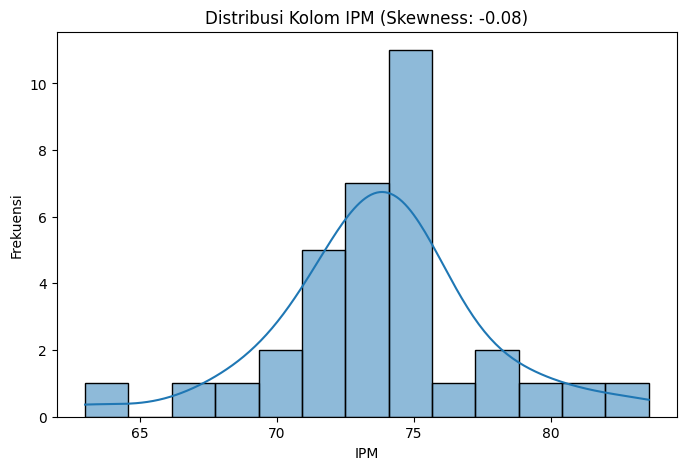

Skewness of IPM: -0.0845017501974255



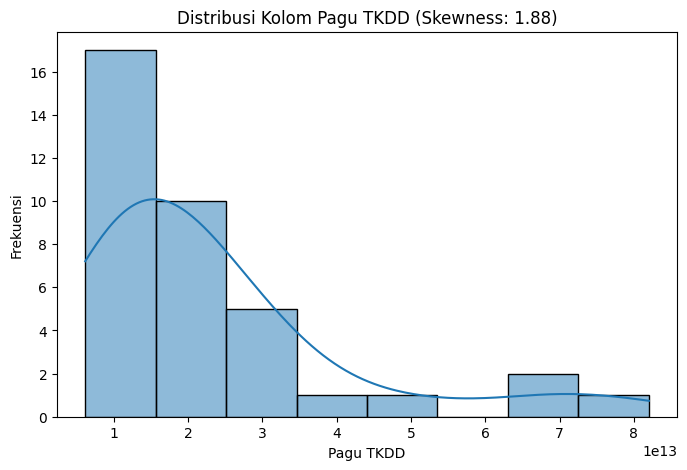

Skewness of Pagu TKDD: 1.8803414904769211



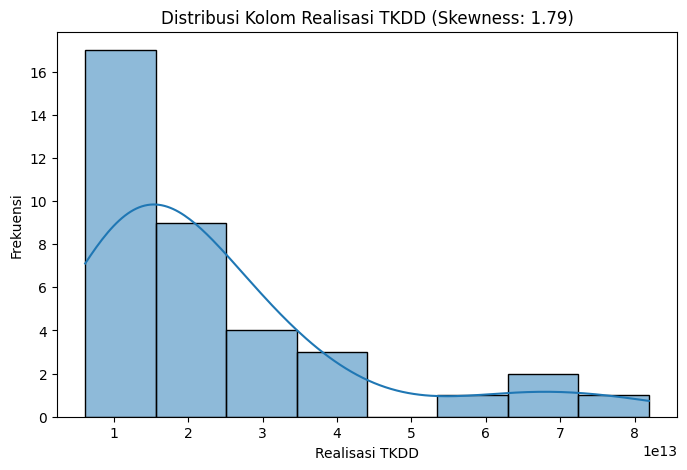

Skewness of Realisasi TKDD: 1.7904457329640626



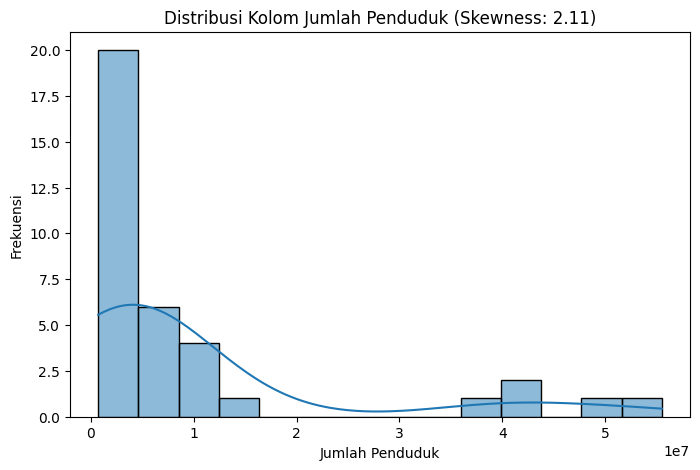

Skewness of Jumlah Penduduk: 2.110716820956249



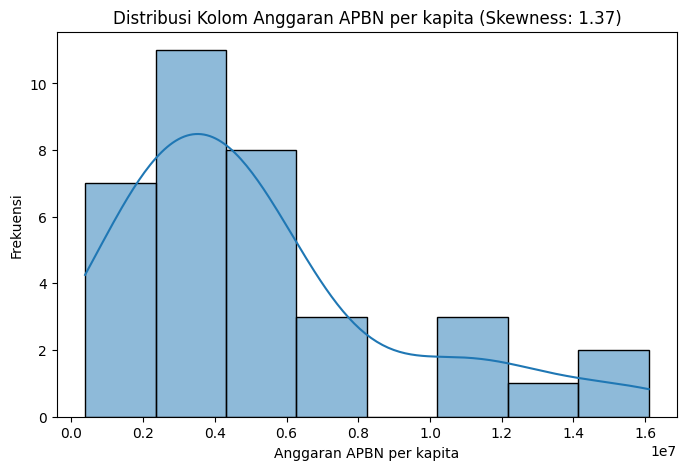

Skewness of Anggaran APBN per kapita: 1.3663222807858793



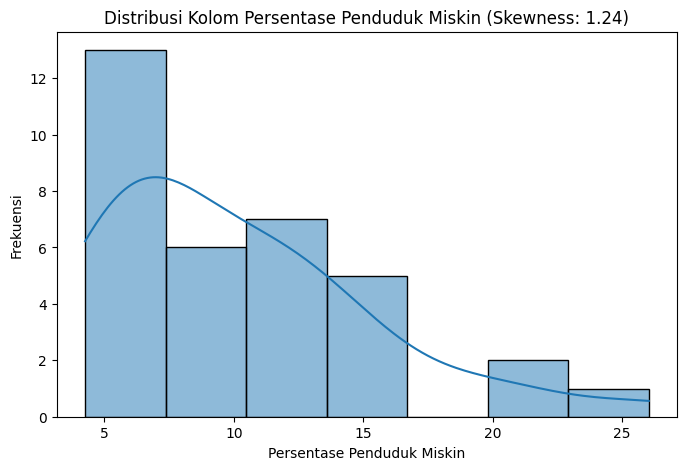

Skewness of Persentase Penduduk Miskin: 1.2388498549174927



In [ ]:
# Membuat visualisasi histogram untuk kolom nilai yang hilang dan menampilkan nilai skewness
for col in columns_with_missing_values:
    skewness = df[col].skew()
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi Kolom {col} (Skewness: {skewness:.2f})')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()
    print(f"Skewness of {col}: {df[col].skew()}")
    print()

### Menentukan Imputasi Berdasarakan Kemiringan (Skewness)
1. Kolom **'IPM'**: Skewness = -0.08, Imputasi = Mean (karena data cenderung simetris atau tidak terlalu miring).

2. Kolom **'Pagu TKDD'**: Skewness = 1.88, Imputasi = Median (karena data cenderung miring atau memiliki outlier).

3. Kolom **'Realisasi TKDD'**: Skewness = 1.79, Imputasi = Median (karena data cenderung miring atau memiliki outlier).

4. Kolom **'Jumlah Penduduk'**: Skewness = 2.11, Imputasi = Median (karena data cenderung miring atau memiliki outlier).

5. Kolom **'Anggaran APBN per kapita'**: Skewness = 1.37, Imputasi = Median (karena data cenderung miring atau memiliki outlier).

6. Kolom **'Persentase Penduduk Miskin'**: Skewness = 1.24, Imputasi = Median (karena data cenderung miring atau memiliki outlier).

In [ ]:
# Imputasi nilai yang hilang

# Imputasi kolom 'IPM' dengan Mean
df['IPM'] = df['IPM'].fillna(df['IPM'].mean())

# Imputasi dengan Median untuk kolom yang miring (skewed)
columns_to_impute_median = ['Pagu TKDD', 'Realisasi TKDD', 'Jumlah Penduduk', 'Anggaran APBN per kapita', 'Persentase Penduduk Miskin']

for col in columns_to_impute_median:
    df[col] = df[col].fillna(df[col].median())

In [ ]:
# Mengecek apakah masih terdapat nilai yang hilang
print(df.isnull().sum())

Provinsi                                                          0
IPM                                                               0
Pagu TKDD                                                         0
Realisasi TKDD                                                    0
Jumlah Penduduk                                                   0
Anggaran APBN per kapita                                          0
Persentase Penduduk Miskin                                        0
Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku    0
Produk Domestik Regional Bruto per Kapita HB                      0
Laju Pertumbuhan PDRB atas dasar konstan 2010                     0
dtype: int64


In [ ]:
print(df.head())

        Provinsi   IPM         Pagu TKDD    Realisasi TKDD  Jumlah Penduduk  \
0           ACEH 74.70 30821480000000.00 31074560000000.00       5409200.00   
1           BALI 78.01 11152110000000.00 11064980000000.00       4374300.00   
2         BANTEN 75.77 17453380000000.00 17467380000000.00      12167000.00   
3       BENGKULU 74.30 10570080000000.00 10559790000000.00       2059400.00   
4  DI YOGYAKARTA 81.09 10355870000000.00 10241290000000.00       3712600.00   

   Anggaran APBN per kapita  Persentase Penduduk Miskin  \
0                5744760.78                       14.45   
1                2529543.01                        4.25   
2                1435635.74                        6.17   
3                5127605.13                       14.04   
4                2758522.33                       11.04   

   Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku  \
0                                          227018.20                
1                               

In [ ]:
# Menampilkan data statistik deskriptif
print(df.describe())

        IPM         Pagu TKDD    Realisasi TKDD  Jumlah Penduduk  \
count 38.00             38.00             38.00            38.00   
mean  73.77 23282896052631.58 23640205789473.68       9862315.24   
std    3.55 18011680289920.36 18305072248258.55      14411697.99   
min   63.01  6172420000000.00  6155410000000.00        720100.00   
25%   72.55 11397287500000.00 11537080000000.00       2256325.00   
50%   73.77 17453380000000.00 17467380000000.00       4402000.00   
75%   74.89 26941420000000.00 28027207500000.00       8124425.00   
max   83.55 82008300000000.00 81921890000000.00      55497000.00   

       Anggaran APBN per kapita  Persentase Penduduk Miskin  \
count                     38.00                       38.00   
mean                 5092588.02                        9.91   
std                  3763151.97                        4.92   
min                   380044.33                        4.25   
25%                  2639821.91                        6.45   
50%      

In [ ]:
# Menampilkan floating point untuk memeriksa kesesuaian
pd.options.display.float_format = '{:.2f}'.format
print(df.head())

        Provinsi   IPM         Pagu TKDD    Realisasi TKDD  Jumlah Penduduk  \
0           ACEH 74.70 30821480000000.00 31074560000000.00       5409200.00   
1           BALI 78.01 11152110000000.00 11064980000000.00       4374300.00   
2         BANTEN 75.77 17453380000000.00 17467380000000.00      12167000.00   
3       BENGKULU 74.30 10570080000000.00 10559790000000.00       2059400.00   
4  DI YOGYAKARTA 81.09 10355870000000.00 10241290000000.00       3712600.00   

   Anggaran APBN per kapita  Persentase Penduduk Miskin  \
0                5744760.78                       14.45   
1                2529543.01                        4.25   
2                1435635.74                        6.17   
3                5127605.13                       14.04   
4                2758522.33                       11.04   

   Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku  \
0                                          227018.20                
1                               



> Menyimpan dataset yang sudah dibersihkan



In [ ]:
# Menyimpan dataset yang telah bersih
output_filename = 'Dataset_Lomba_Data_Analytics_TECHFEST_2025_bersih.csv'
df.to_csv(output_filename, index=False)

print(f"Dataset berhasil disimpan sebagai {output_filename}")

Dataset berhasil disimpan sebagai Dataset_Lomba_Data_Analytics_TECHFEST_2025_bersih.csv


# **Analisis Rumusan Masalah**

## 1. Bagaimana tingkat perbandingan antara pagu dan realisasi TKDD di setiap provinsi di Indonesia tahun 2023?



> Menampilkan kolom Pagu vs Realisasi TKDD



In [ ]:
print(df[['Provinsi', 'Pagu TKDD', 'Realisasi TKDD']])

                Provinsi         Pagu TKDD    Realisasi TKDD
0                   ACEH 30821480000000.00 31074560000000.00
1                   BALI 11152110000000.00 11064980000000.00
2                 BANTEN 17453380000000.00 17467380000000.00
3               BENGKULU 10570080000000.00 10559790000000.00
4          DI YOGYAKARTA 10355870000000.00 10241290000000.00
5            DKI JAKARTA 24694990000000.00 25080180000000.00
6              GORONTALO  6172420000000.00  6155410000000.00
7                  JAMBI 15232070000000.00 15352670000000.00
8             JAWA BARAT 71321760000000.00 71031690000000.00
9            JAWA TENGAH 67129690000000.00 66772060000000.00
10            JAWA TIMUR 82008300000000.00 81921890000000.00
11      KALIMANTAN BARAT 20797470000000.00 21091320000000.00
12    KALIMANTAN SELATAN 31630780000000.00 34980280000000.00
13     KALIMANTAN TENGAH 27690230000000.00 28862210000000.00
14      KALIMANTAN TIMUR 51643470000000.00 57314680000000.00
15      KALIMANTAN UTARA



> Menghitung selisih Realisasi - Pagu TKDD



In [ ]:
df['Selisih TKDD'] = df['Realisasi TKDD'] - df['Pagu TKDD']
print(df['Selisih TKDD'])

0     253080000000.00
1     -87130000000.00
2      14000000000.00
3     -10290000000.00
4    -114580000000.00
5     385190000000.00
6     -17010000000.00
7     120600000000.00
8    -290070000000.00
9    -357630000000.00
10    -86410000000.00
11    293850000000.00
12   3349500000000.00
13   1171980000000.00
14   5671210000000.00
15    598860000000.00
16    -43330000000.00
17    904050000000.00
18     19880000000.00
19    -83440000000.00
20    101830000000.00
21    -35300000000.00
22   -134350000000.00
23   -693360000000.00
24    383130000000.00
25    -31440000000.00
26   -721380000000.00
27   -436810000000.00
28    546040000000.00
29   1050520000000.00
30    -43850000000.00
31    -96700000000.00
32    198090000000.00
33    379620000000.00
34     14000000000.00
35   -169280000000.00
36   1567960000000.00
37      6740000000.00
Name: Selisih TKDD, dtype: float64




> Ranking Provinsi berdasarkan selisih



In [ ]:
print("Provinsi dengan realisasi TERKECIL dibanding pagu:")
print(df[['Provinsi', 'Selisih TKDD']].sort_values('Selisih TKDD').head())

Provinsi dengan realisasi TERKECIL dibanding pagu:
            Provinsi     Selisih TKDD
26  PAPUA PEGUNUNGAN -721380000000.00
23             PAPUA -693360000000.00
27     PAPUA SELATAN -436810000000.00
9        JAWA TENGAH -357630000000.00
8         JAWA BARAT -290070000000.00


In [ ]:
print("\nProvinsi dengan realisasi TERBESAR dibanding pagu:")
print(df[['Provinsi', 'Selisih TKDD']].sort_values('Selisih TKDD', ascending=False).head())


Provinsi dengan realisasi TERBESAR dibanding pagu:
              Provinsi     Selisih TKDD
14    KALIMANTAN TIMUR 5671210000000.00
12  KALIMANTAN SELATAN 3349500000000.00
36    SUMATERA SELATAN 1567960000000.00
13   KALIMANTAN TENGAH 1171980000000.00
29                RIAU 1050520000000.00


### Hasil Analisis

* Berdasarkan selisih nominal antara realisasi TKDD dan pagu TKDD, lima provinsi yang mengalami realisasi paling rendah dibanding pagu adalah Papua Pegunungan, Papua, Papua Selatan, Jawa Tengah, dan Jawa Barat. Papua Pegunungan mencatat selisih negatif terbesar, yakni sekitar Rp 7,21 triliun lebih rendah dari pagu yang telah dialokasikan. Disusul Provinsi Papua dengan realisasi Rp 6,93 triliun lebih rendah dari pagu. Hal ini menunjukkan bahwa di wilayah Papua masih terdapat kendala dalam menyerap dana yang telah dialokasikan.

* Di sisi lain, terdapat provinsi yang mencatat realisasi TKDD melebihi pagu yang ditetapkan. Kalimantan Timur tercatat memiliki selisih realisasi positif terbesar, yaitu sekitar Rp 5,67 triliun lebih tinggi dari pagu. Selain itu, Kalimantan Selatan, Sumatera Selatan, Kalimantan Tengah, dan Riau juga menunjukkan selisih realisasi positif signifikan, masing-masing lebih dari Rp 1 triliun.

## 2. Provinsi mana yang memiliki tingkat realisasi tertinggi dan terendah?



> Menghitung persentase realisasi



In [ ]:
df['Persentase Realisasi TKDD'] = (df['Realisasi TKDD'] / df['Pagu TKDD']) * 100



> Klasifikasi persentase 3 kategori

- dibawah 90%
- diantara 90 - 100%
- diatas 100%


In [ ]:
df['Kategori Realisasi TKDD'] = pd.cut(
    df['Persentase Realisasi TKDD'],
    bins=[0, 90, 100, df['Persentase Realisasi TKDD'].max()],
    labels=['< 90%', '90-100%', '> 100%'],
    right=True
)



> Menghitung jumlah provinsi di tiap kategori



In [ ]:
kategori_counts = df['Kategori Realisasi TKDD'].value_counts()
print(kategori_counts)

Kategori Realisasi TKDD
> 100%     20
90-100%    18
< 90%       0
Name: count, dtype: int64




> Menampilkan provinsi di tiap kategori



In [ ]:
# Provinsi dengan realisasi dibawah 90%
under_90 = df[df['Persentase Realisasi TKDD'] < 90]

if not under_90.empty:
    print("\nProvinsi dengan realisasi TKDD di bawah 90%:")
    print(under_90[['Provinsi', 'Pagu TKDD', 'Realisasi TKDD', 'Persentase Realisasi TKDD']])
else:
    print("\nTidak ada provinsi dengan realisasi TKDD di bawah 90%.")


Tidak ada provinsi dengan realisasi TKDD di bawah 90%.


In [ ]:
# Provinsi dengan realisasi diantara 90 - 100%
between_90_100 = df[(df['Persentase Realisasi TKDD'] >= 90) & (df['Persentase Realisasi TKDD'] <= 100)]

if not between_90_100.empty:
    print("\nProvinsi dengan realisasi TKDD di antara 90% dan 100%:")
    print(between_90_100[['Provinsi', 'Pagu TKDD', 'Realisasi TKDD', 'Persentase Realisasi TKDD']])
else:
    print("\nTidak ada provinsi dengan realisasi TKDD di antara 90% dan 100%.")


Provinsi dengan realisasi TKDD di antara 90% dan 100%:
                Provinsi         Pagu TKDD    Realisasi TKDD  \
1                   BALI 11152110000000.00 11064980000000.00   
3               BENGKULU 10570080000000.00 10559790000000.00   
4          DI YOGYAKARTA 10355870000000.00 10241290000000.00   
6              GORONTALO  6172420000000.00  6155410000000.00   
8             JAWA BARAT 71321760000000.00 71031690000000.00   
9            JAWA TENGAH 67129690000000.00 66772060000000.00   
10            JAWA TIMUR 82008300000000.00 81921890000000.00   
16  KEP. BANGKA BELITUNG  7497480000000.00  7454150000000.00   
19                MALUKU 12132820000000.00 12049380000000.00   
21   NUSA TENGGARA BARAT 17422350000000.00 17387050000000.00   
22   NUSA TENGGARA TIMUR 24260850000000.00 24126500000000.00   
23                 PAPUA 12211710000000.00 11518350000000.00   
25      PAPUA BARAT DAYA 10163480000000.00 10132040000000.00   
26      PAPUA PEGUNUNGAN 13543140000000.00 12821

In [ ]:
# Provinsi dengan realisasi diatas 100%
over_100 = df[df['Persentase Realisasi TKDD'] > 100]

if not over_100.empty:
    print("\nProvinsi dengan realisasi TKDD di atas 100%:")
    print(over_100[['Provinsi', 'Pagu TKDD', 'Realisasi TKDD', 'Persentase Realisasi TKDD']])
else:
    print("\nTidak ada provinsi dengan realisasi TKDD di atas 100%.")


Provinsi dengan realisasi TKDD di atas 100%:
              Provinsi         Pagu TKDD    Realisasi TKDD  \
0                 ACEH 30821480000000.00 31074560000000.00   
2               BANTEN 17453380000000.00 17467380000000.00   
5          DKI JAKARTA 24694990000000.00 25080180000000.00   
7                JAMBI 15232070000000.00 15352670000000.00   
11    KALIMANTAN BARAT 20797470000000.00 21091320000000.00   
12  KALIMANTAN SELATAN 31630780000000.00 34980280000000.00   
13   KALIMANTAN TENGAH 27690230000000.00 28862210000000.00   
14    KALIMANTAN TIMUR 51643470000000.00 57314680000000.00   
15    KALIMANTAN UTARA 10994410000000.00 11593270000000.00   
17           KEP. RIAU  9246690000000.00 10150740000000.00   
18             LAMPUNG 21508120000000.00 21528000000000.00   
20        MALUKU UTARA 14200220000000.00 14302050000000.00   
24         PAPUA BARAT 14013240000000.00 14396370000000.00   
28        PAPUA TENGAH 14395230000000.00 14941270000000.00   
29                RIAU 2



> Visualisasi untuk melihat perbandingan persentase setiap kategori



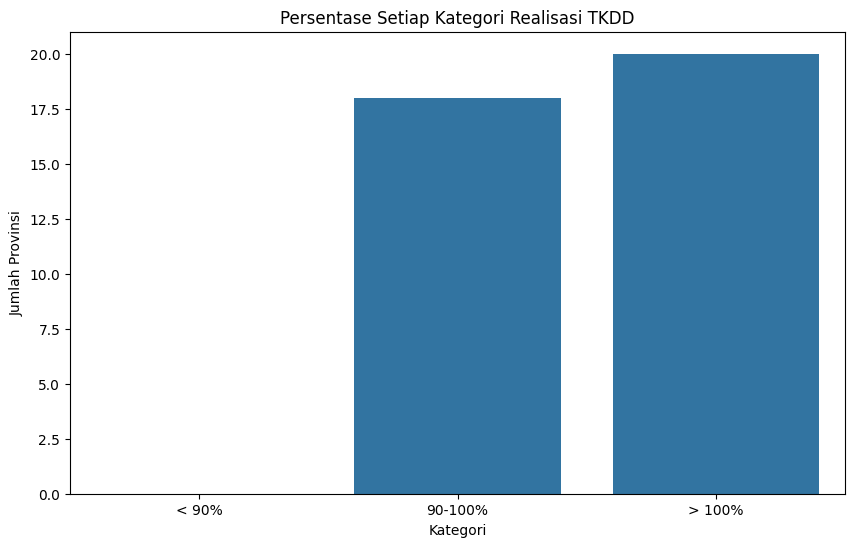

In [ ]:
# Visualisasi Barplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Kategori Realisasi TKDD')
plt.title('Persentase Setiap Kategori Realisasi TKDD')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Provinsi')
plt.show()

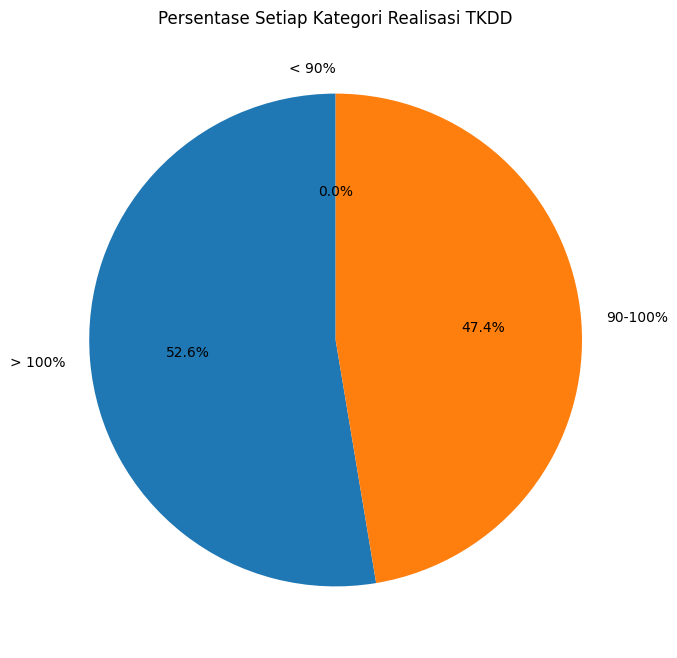

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(kategori_counts, labels=kategori_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Persentase Setiap Kategori Realisasi TKDD')
plt.show()

### Hasil Analisis

* Berdasarkan analisis persentase realisasi TKDD tahun 2023, diketahui bahwa tidak ada satupun provinsi yang memiliki tingkat realisasi di bawah 90%. Artinya, semua provinsi setidaknya berhasil menyerap lebih dari 90% dari pagu TKDD yang dialokasikan. Sebanyak 18 provinsi (47,4%) tercatat memiliki persentase realisasi antara 90% hingga 100%, menunjukkan penyerapan anggaran yang mendekati rencana semula. Sementara itu, 20 provinsi (52,6%) justru memiliki persentase realisasi melebihi 100%, yang mengindikasikan adanya penambahan alokasi anggaran di luar pagu awal.

* Berdasarkan presentase realisasi maka dapat diketahui bahwa provinsi dengan tingkat realisasi TKDD tertinggi pada tahun 2023 adalah Provinsi Kalimantan Timur, yang berhasil merealisasikan anggarannya hingga mencapai 110,98% dari pagu yang telah ditetapkan. Capaian ini menunjukkan bahwa Kalimantan Timur tidak hanya mampu menyerap seluruh anggaran yang dialokasikan, tetapi juga memperoleh tambahan dana. Sebaliknya, provinsi dengan tingkat realisasi TKDD terendah adalah Provinsi Sumatera Barat, dengan persentase realisasi sebesar 99,17%. Meskipun masih tergolong tinggi dan mendekati 100%, angka ini menunjukkan bahwa masih terdapat sebagian kecil dana yang belum berhasil dimanfaatkan secara maksimal oleh pemerintah daerah setempat.




## 3. Apa kemungkinan faktor-faktor yang mempengaruhi tinggi-rendahnya realisasi TKDD?

### Memahami **Variabel Potensial** berdasarkan konteks dan logika dataset yang memengaruhi tinggi-rendahnya Realisasi TKDD

Dalam menganalisis faktor-faktor yang mempengaruhi tinggi-rendahnya realisasi TKDD, beberapa variabel dipertimbangkan sebagai Variabel Potensial karena memiliki keterkaitan logis dan kontekstual terhadap alokasi maupun penyerapan dana di masing-masing provinsi. Variabel-variabel tersebut antara lain:

1. Jumlah Penduduk
> Jumlah penduduk suatu provinsi menjadi salah satu faktor penting karena semakin besar populasi, semakin besar pula kebutuhan pelayanan publik, infrastruktur, pendidikan, kesehatan, dan program sosial. Kebutuhan ini dapat mendorong tingginya realisasi TKDD karena pemerintah daerah memerlukan dana lebih besar untuk membiayai berbagai program pembangunan yang bersifat padat layanan.

2. Anggaran APBN per Kapita
> Anggaran APBN per kapita mencerminkan rata-rata dukungan fiskal pusat yang diterima oleh setiap penduduk di provinsi tersebut. Provinsi dengan nilai APBN per kapita yang tinggi berpotensi memiliki ruang fiskal lebih besar untuk membiayai program pembangunan, sehingga dapat mempengaruhi tinggi-rendahnya realisasi TKDD.

3. Persentase Penduduk Miskin
> Persentase penduduk miskin menunjukkan seberapa besar beban sosial dan ekonomi yang harus ditangani pemerintah daerah. Semakin tinggi angka kemiskinan, semakin banyak dana yang dibutuhkan untuk program bantuan sosial, pemberdayaan masyarakat, maupun pembangunan infrastruktur dasar. Faktor ini berpotensi mendorong tingginya realisasi TKDD, meskipun tidak selalu secara langsung.

4. Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku (ADHB)
> PDRB ADHB menggambarkan total nilai barang dan jasa yang dihasilkan suatu daerah dalam satu tahun. Provinsi dengan PDRB besar biasanya memiliki aktivitas ekonomi yang lebih tinggi, proyek pembangunan yang lebih banyak, dan kapasitas serapan anggaran yang lebih baik. Hal ini berpotensi berkorelasi positif dengan tingginya realisasi TKDD.

5. Produk Domestik Regional Bruto per Kapita
> PDRB per kapita menunjukkan tingkat kemakmuran rata-rata penduduk di suatu daerah. Provinsi dengan PDRB per kapita tinggi biasanya memiliki daya dukung fiskal dan kapasitas institusional yang lebih baik untuk menyerap dana pembangunan, sehingga berpotensi memengaruhi realisasi TKDD.

6. Laju Pertumbuhan PDRB Atas Dasar Konstan 2010
> Laju pertumbuhan PDRB mencerminkan dinamika ekonomi daerah. Provinsi yang ekonominya tumbuh cepat seringkali mengalami peningkatan kebutuhan belanja pembangunan, baik untuk infrastruktur pendukung, pelayanan publik, maupun program-program strategis lainnya. Hal ini dapat berdampak pada tingginya realisasi TKDD.

Disisi lain, variabel Provinsi, IPM, dan Pagu TKDD tidak termasuk dalam Variabel Potensial. Variabel Provinsi bukan variabel numerik, IPM  adalah hasil pembangunan yang lebih cocok dianalisis sebagai dampak, dan Pagu TKDD merupakan komponen internal mekanisme anggaran.

In [ ]:
variabel_potensial_realisasitkdd = [
    'Jumlah Penduduk',
    'Anggaran APBN per kapita',
    'Persentase Penduduk Miskin',
    'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku',
    'Produk Domestik Regional Bruto per Kapita HB',
    'Laju Pertumbuhan PDRB atas dasar konstan 2010'
]

- Korelasi terhadap Variabel Target (Realisasi TKDD)

- Nilai mendekati:

    +1 → hubungan positif kuat (semakin besar realisasi)

    0 → tidak ada hubungan

    -1 → hubungan negatif kuat

In [ ]:
# Menambahkan Realisasi TKDD ke daftar
cols_realisasitkdd = ['Realisasi TKDD'] + variabel_potensial_realisasitkdd

# Hitung korelasi
cor_matrix_realisasitkdd = df[cols_realisasitkdd].corr(numeric_only=True)
cor_target_realisasitkdd = cor_matrix_realisasitkdd['Realisasi TKDD'].drop('Realisasi TKDD').sort_values(ascending=False)

# Tampilkan
print("Korelasi terhadap Realisasi TKDD:")
print(cor_target_realisasitkdd)

Korelasi terhadap Realisasi TKDD:
Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku    0.73
Jumlah Penduduk                                                   0.68
Produk Domestik Regional Bruto per Kapita HB                      0.08
Laju Pertumbuhan PDRB atas dasar konstan 2010                    -0.03
Persentase Penduduk Miskin                                       -0.12
Anggaran APBN per kapita                                         -0.14
Name: Realisasi TKDD, dtype: float64


- Visualisasi Korelasi

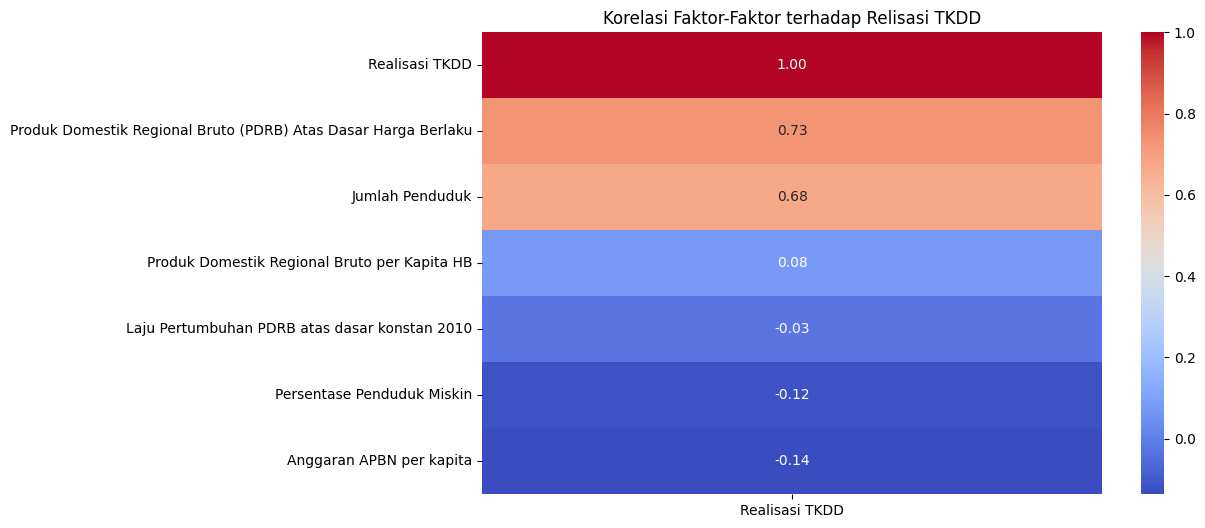

In [ ]:
# Visualisasi Heatmap Korelasi terhadap variabel target
plt.figure(figsize=(10, 6))
sns.heatmap(cor_matrix_realisasitkdd[['Realisasi TKDD']].sort_values(by='Realisasi TKDD', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Faktor-Faktor terhadap Relisasi TKDD')
plt.show()

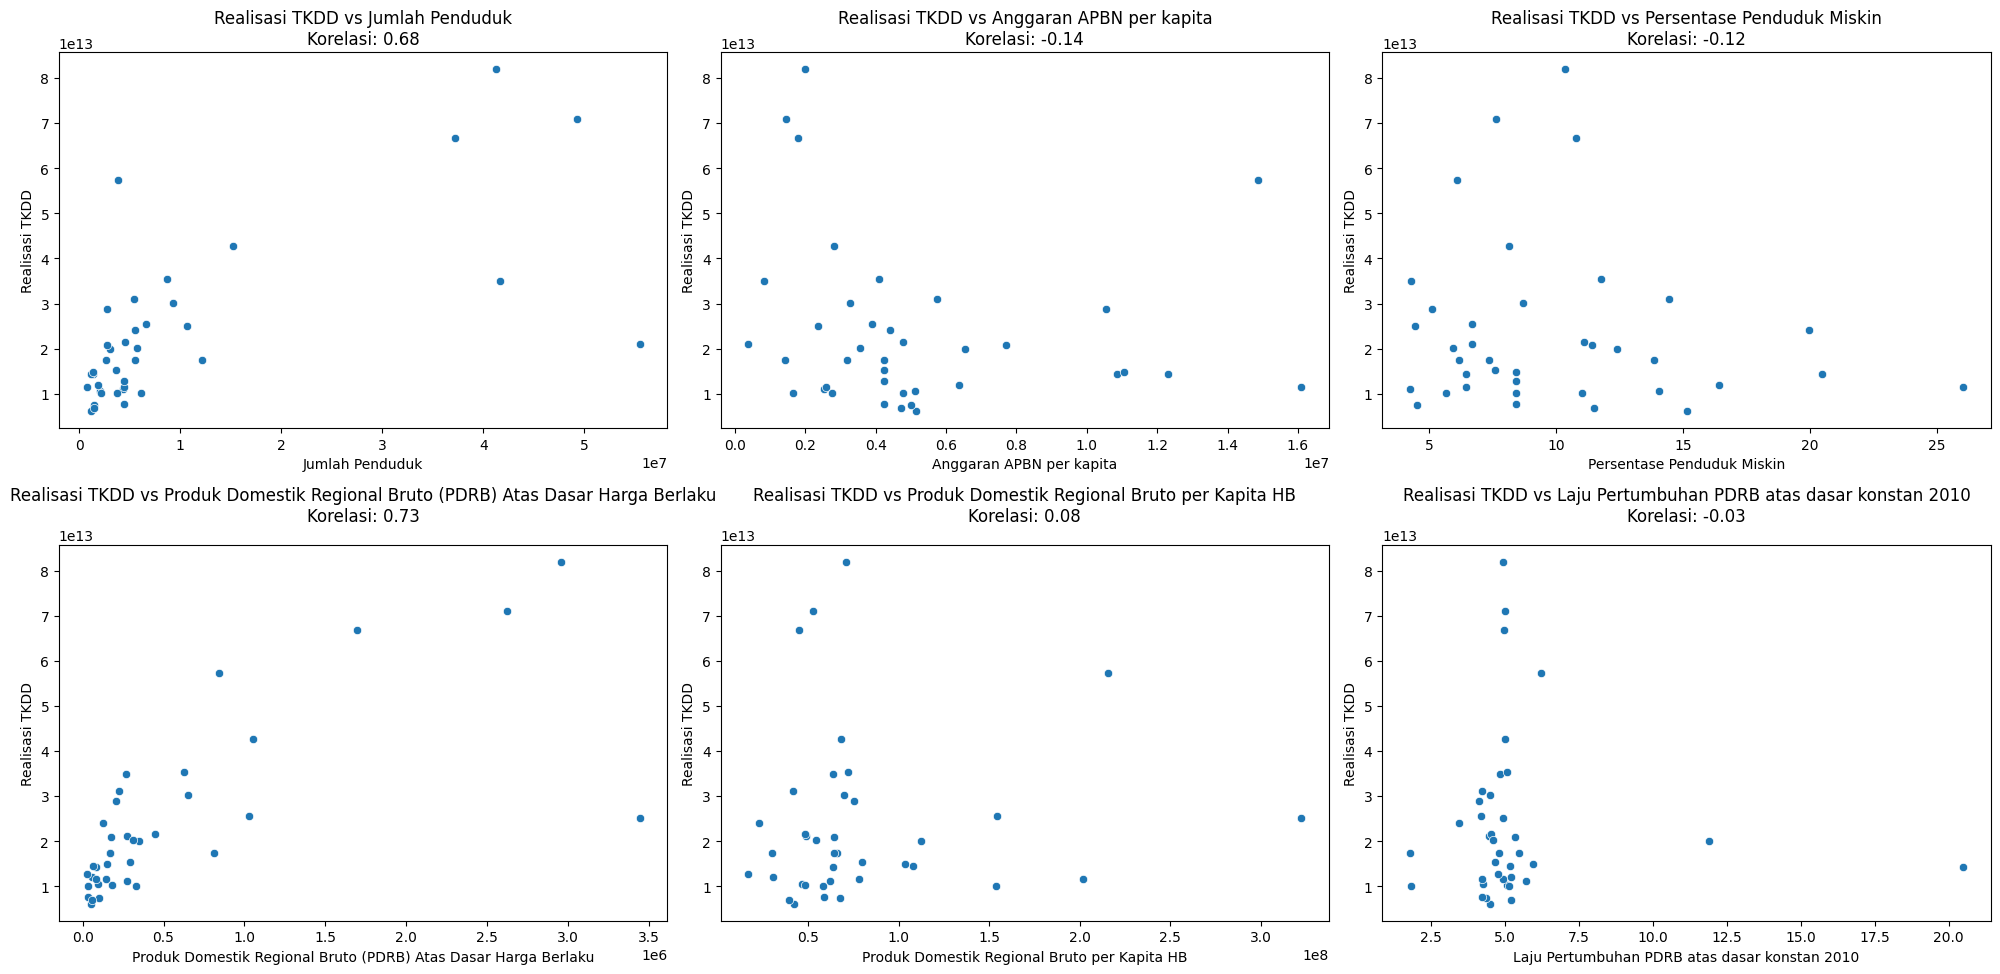

In [ ]:
# Visualisasi Scatter Plot untuk melihat variabel tertinggi korelasi

# Grid subplot
rows = 2
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(20, 10))

# Flatten axes array supaya mudah loop
axes = axes.flatten()

# Loop setiap variabel
for i, var in enumerate(variabel_potensial_realisasitkdd):
    # Hitung korelasi Pearson
    corr = df[var].corr(df['Realisasi TKDD'])

    # Plot scatter
    sns.scatterplot(
        data=df,
        x=var,
        y='Realisasi TKDD',
        ax=axes[i]
    )

    # Set judul dengan korelasi
    axes[i].set_title(f'Realisasi TKDD vs {var}\nKorelasi: {corr:.2f}', fontsize=12)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Realisasi TKDD')

# MenghIlangkan axes kosong jika variabel kurang dari grid
for j in range(i+1, rows*cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Hasil Analisis

* Berdasarkan hasil analisis korelasi, Realisasi TKDD menunjukkan hubungan yang cukup kuat dengan Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku (r = 0,73) serta jumlah penduduk (r = 0,68). Ini menunjukkan bahwa provinsi dengan skala ekonomi lebih besar dan jumlah penduduk lebih banyak cenderung memiliki nilai realisasi TKDD yang lebih tinggi

* Sementara itu, korelasi Realisasi TKDD dengan variabel lain relatif rendah. Produk Domestik Regional Bruto per Kapita memiliki korelasi sebesar 0,08, laju pertumbuhan PDRB sebesar -0,03, persentase penduduk miskin sebesar -0,12, dan anggaran APBN per kapita sebesar -0,14. Nilai korelasi yang rendah ini mengindikasikan bahwa faktor-faktor tersebut memiliki keterkaitan yang lebih lemah terhadap besaran realisasi TKDD di tingkat provinsi.

## 4. Apakah terdapat hubungan antara realisasi TKDD dan IPM suatu provinsi?

- Menghitung Korelasi untuk melihat apakah ada hubungan linear

- Nilai mendekati:

    +1 → hubungan positif kuat (semakin besar realisasi, IPM makin tinggi)

    0 → tidak ada hubungan

    -1 → hubungan negatif kuat

In [ ]:
corr_ipm = df['Realisasi TKDD'].corr(df['IPM'])
print(f"Korelasi Realisasi TKDD vs IPM: {corr_ipm:.4f}")

Korelasi Realisasi TKDD vs IPM: 0.1570


- Visualisasi untuk melihat pola hubungan

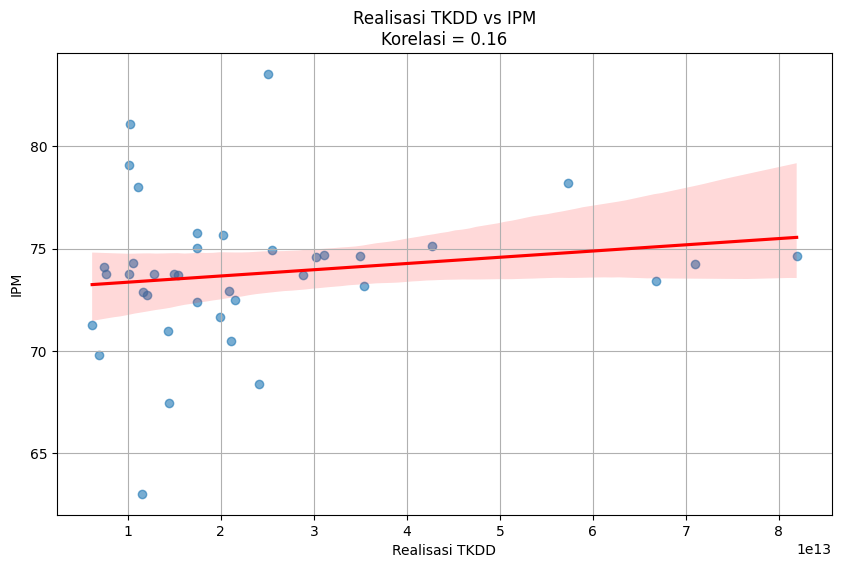

In [ ]:
# Visualisasi Scatter Plot dengan trendline untuk melihat kecendrungan
plt.figure(figsize=(10,6))
sns.regplot(
    data=df,
    x='Realisasi TKDD',
    y='IPM',
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'}
)
plt.title(f"Realisasi TKDD vs IPM\nKorelasi = {corr_ipm:.2f}")
plt.xlabel('Realisasi TKDD')
plt.ylabel('IPM')
plt.grid(True)
plt.show()

### Hasil Analisis

* Berdasarkan perhitungan korelasi Pearson, nilai korelasi antara Realisasi TKDD dan IPM di seluruh provinsi Indonesia pada tahun 2023 adalah sebesar 0,16. Nilai ini menunjukkan adanya hubungan positif yang sangat lemah antara besaran realisasi TKDD dengan Indeks Pembangunan Manusia (IPM). Artinya, provinsi dengan realisasi TKDD yang lebih tinggi cenderung memiliki IPM sedikit lebih tinggi, namun hubungan tersebut tidak cukup kuat untuk menunjukkan keterkaitan yang signifikan.

* Pada visualisasi scatter plot juga terlihat, di mana titik-titik data tersebar cukup luas dan garis tren menunjukkan kemiringan positif yang sangat landai. Sebagian besar provinsi memiliki nilai realisasi TKDD yang beragam meskipun memiliki tingkat IPM yang relatif serupa, sehingga tidak tampak pola hubungan yang kuat antara kedua variabel ini.

## 5. Apa saja faktor-faktor yang memengaruhi IPM di tiap provinsi Indonesia pada tahun 2023?

### Memahami **Variabel Potensial** berdasarkan konteks dan logika dataset yang memengaruhi IPM (Indeks Pembangunan Manusia)

Dalam menganalisis faktor-faktor yang memengaruhi Indeks Pembangunan Manusia (IPM) di setiap provinsi Indonesia, sejumlah variabel dianggap memiliki potensi hubungan signifikan karena secara konseptual dan logis terkait erat dengan aspek pembangunan manusia. Variabel-variabel tersebut antara lain:

1. Realisasi TKDD
> Realisasi TKDD mencerminkan besaran dana pembangunan yang benar-benar diserap daerah untuk membiayai berbagai program publik, termasuk infrastruktur, pendidikan, dan kesehatan. Besarnya realisasi TKDD diharapkan dapat berdampak positif terhadap peningkatan IPM, karena lebih banyak dana berarti potensi lebih besar untuk meningkatkan layanan publik dan kesejahteraan masyarakat.

2. Jumlah Penduduk
> Jumlah penduduk suatu provinsi dapat memengaruhi IPM karena provinsi dengan populasi besar memiliki tantangan lebih besar dalam menyediakan layanan pendidikan, kesehatan, dan standar hidup yang merata. Semakin besar jumlah penduduk, semakin kompleks upaya untuk meningkatkan rata-rata indikator pembangunan manusia.

3. Anggaran APBN per Kapita
> Anggaran APBN per kapita menjadi indikator daya dukung fiskal rata-rata yang diterima penduduk di suatu provinsi. Provinsi dengan nilai APBN per kapita yang lebih tinggi umumnya memiliki ruang fiskal yang lebih besar untuk mendanai program-program pembangunan yang berdampak langsung terhadap kualitas hidup masyarakat.

4. Persentase Penduduk Miskin
> Persentase penduduk miskin menunjukkan tingkat kesejahteraan sosial dan ekonomi masyarakat. Semakin tinggi persentase kemiskinan, semakin besar pula tantangan daerah untuk meningkatkan IPM, karena banyak penduduk hidup dalam keterbatasan akses pendidikan, kesehatan, dan standar hidup layak.

5. Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku (ADHB)
> PDRB ADHB menggambarkan total nilai barang dan jasa yang dihasilkan di suatu daerah. Daerah dengan PDRB tinggi memiliki aktivitas ekonomi lebih besar, yang secara tidak langsung berpotensi meningkatkan layanan publik, lapangan kerja, dan kesejahteraan masyarakat, yang kemudian berdampak pada kenaikan IPM.

6. Produk Domestik Regional Bruto per Kapita
> PDRB per kapita menunjukkan tingkat kemakmuran rata-rata penduduk. Provinsi dengan PDRB per kapita tinggi umumnya memiliki kualitas hidup lebih baik, akses pendidikan dan kesehatan lebih memadai, serta tingkat kesejahteraan yang lebih tinggi, yang semuanya merupakan komponen pembentuk IPM.

7. Laju Pertumbuhan PDRB Atas Dasar Konstan 2010
> Laju pertumbuhan PDRB menunjukkan dinamika ekonomi daerah. Daerah dengan pertumbuhan ekonomi yang tinggi umumnya mengalami perbaikan infrastruktur, investasi, dan penciptaan lapangan kerja yang lebih banyak, yang pada akhirnya dapat berkontribusi terhadap peningkatan IPM.

Disisi lain variabel Provinsi, dan Pagu TKDD tidak termasuk sebagai Variabel Potensial karena variabel Provinsi bukan variabel numerik dan variabel Pagu TKDD merupakan komponen internal mekanisme anggaran.

In [ ]:
variabel_potensial_ipm = [
    'Realisasi TKDD',
    'Jumlah Penduduk',
    'Anggaran APBN per kapita',
    'Persentase Penduduk Miskin',
    'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku',
    'Produk Domestik Regional Bruto per Kapita HB',
    'Laju Pertumbuhan PDRB atas dasar konstan 2010'
]

- Korelasi terhadap Variabel Target (IPM)

- Nilai mendekati:

    +1 → hubungan positif kuat (semakin besar realisasi)

    0 → tidak ada hubungan

    -1 → hubungan negatif kuat

In [ ]:
# Menambahkan IPM ke daftar
cols_ipm = ['IPM'] + variabel_potensial_ipm

# Hitung korelasi
cor_matrix_ipm = df[cols_ipm].corr(numeric_only=True)
cor_target_ipm = cor_matrix_ipm['IPM'].drop('IPM').sort_values(ascending=False)

# Tampilkan
print("Korelasi faktor-faktor terhadap IPM:")
print(cor_target_ipm)

Korelasi faktor-faktor terhadap IPM:
Produk Domestik Regional Bruto per Kapita HB                      0.45
Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku    0.42
Realisasi TKDD                                                    0.16
Jumlah Penduduk                                                   0.02
Laju Pertumbuhan PDRB atas dasar konstan 2010                    -0.08
Anggaran APBN per kapita                                         -0.13
Persentase Penduduk Miskin                                       -0.69
Name: IPM, dtype: float64


-  Visualisasi Korelasi

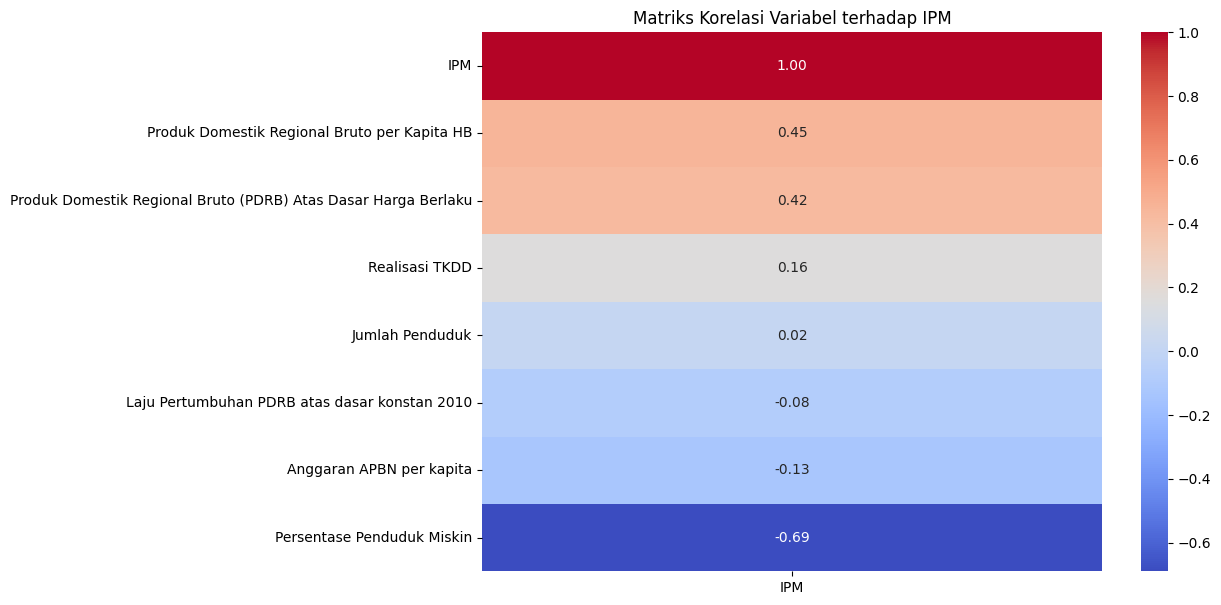

In [ ]:
# Visualisasi Heatmap Korelasi terhadap variabel target
plt.figure(figsize=(10, 7))
sns.heatmap(cor_matrix_ipm[['IPM']].sort_values(by='IPM', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Variabel terhadap IPM')
plt.show()

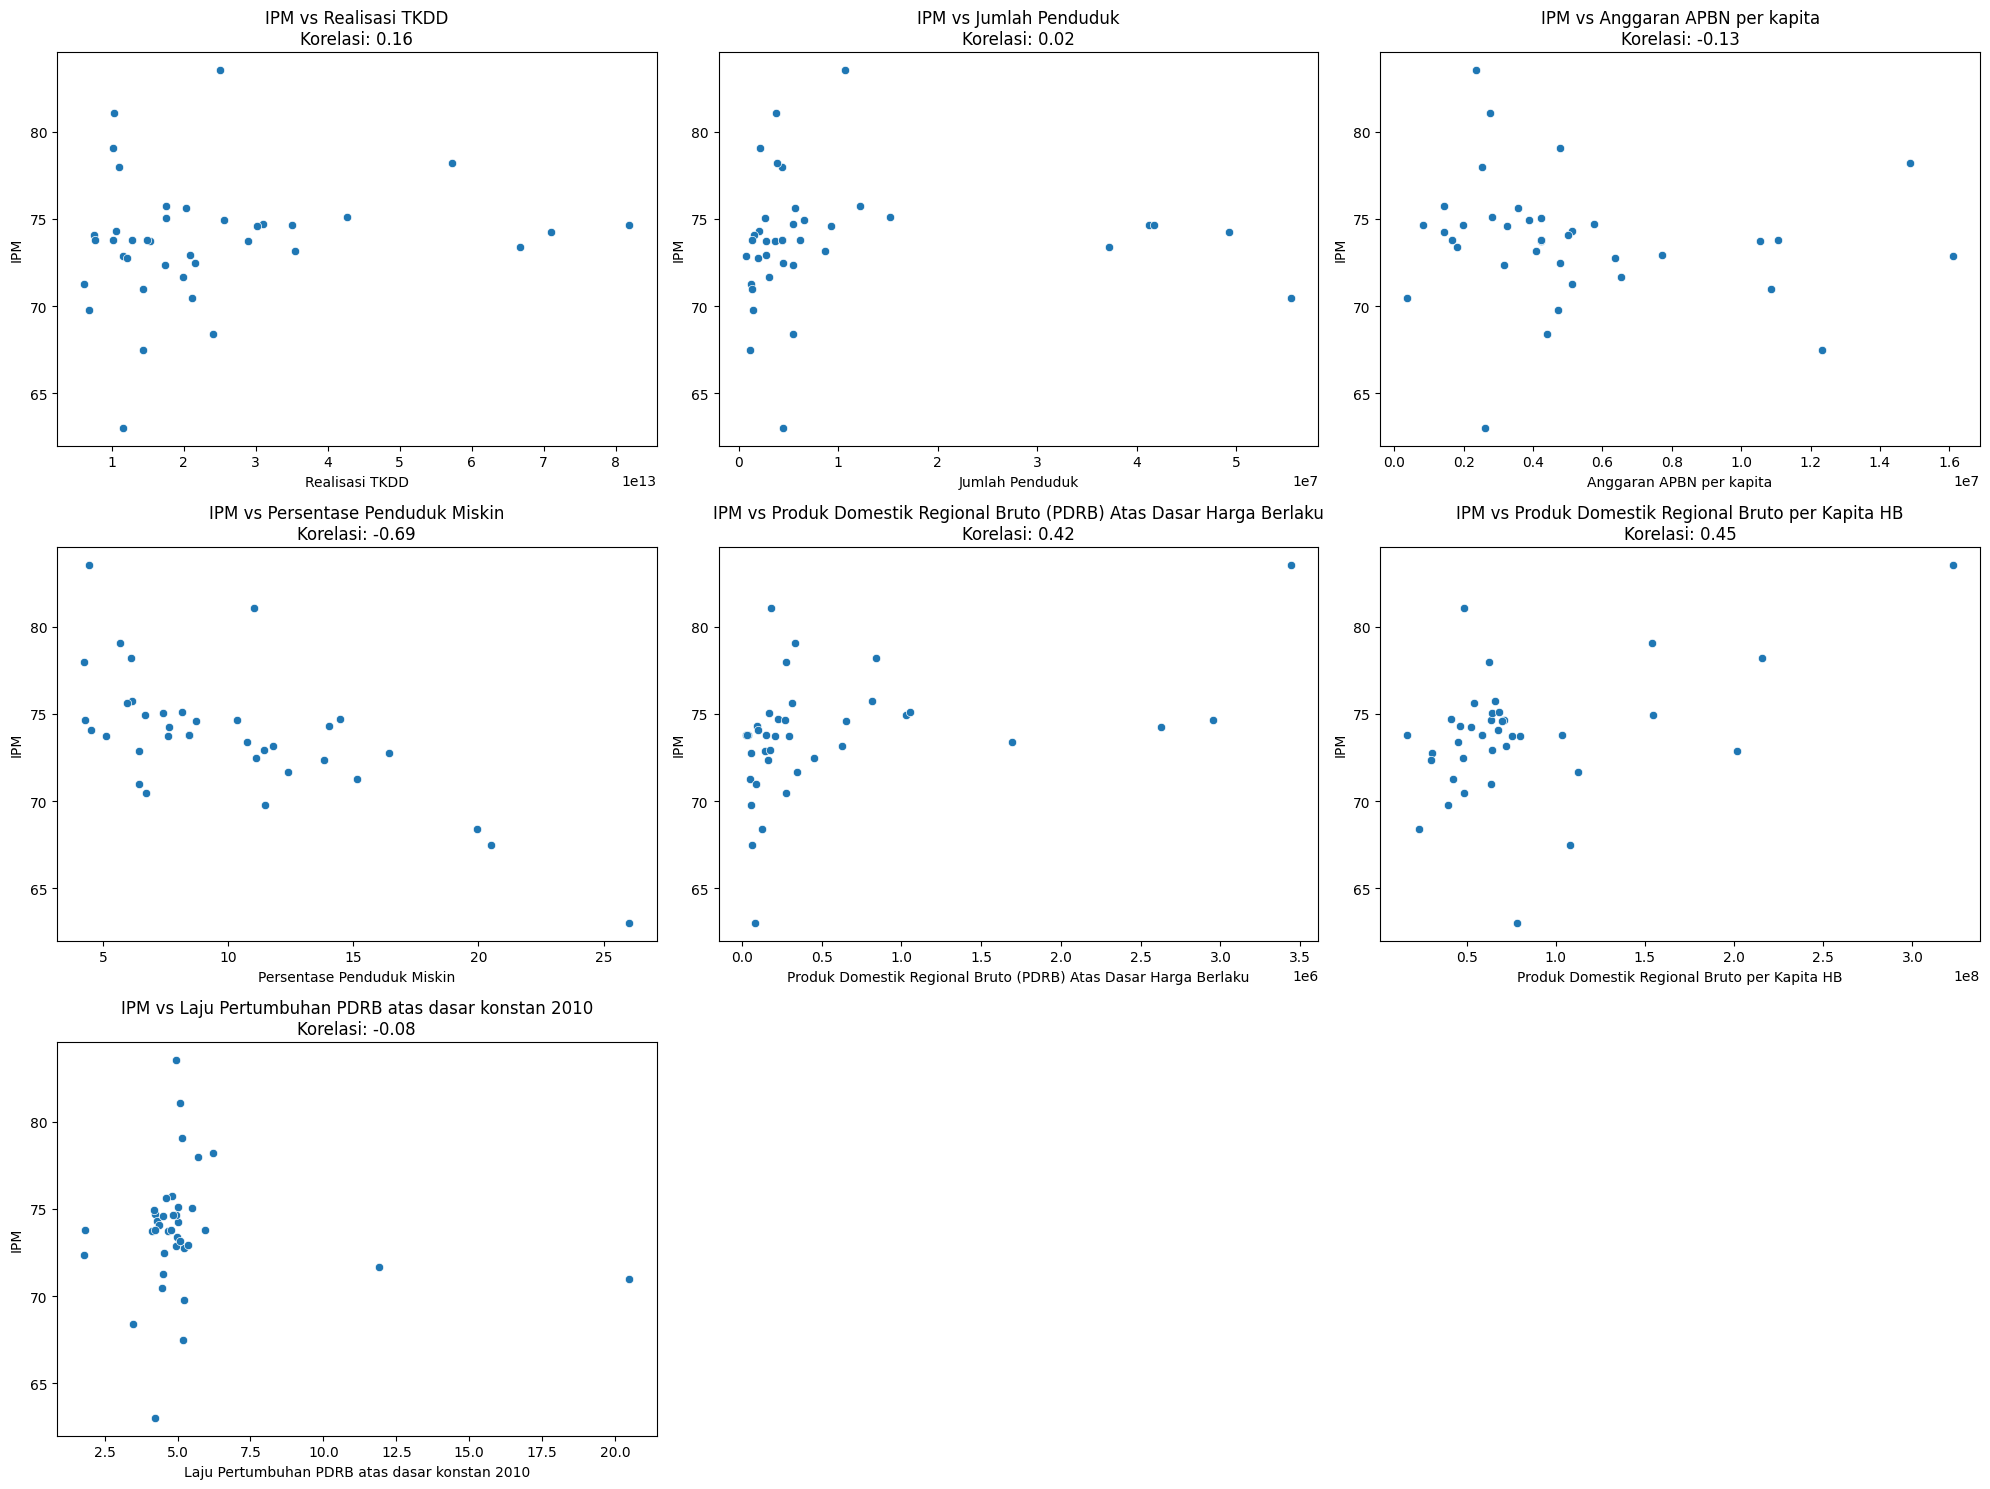

In [ ]:
# Visualisasi Scatter Plot untuk melihat variabel tertinggi korelasi

# Grid subplot
rows = 3
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))

# Flatten axes array supaya mudah loop
axes = axes.flatten()

# Loop setiap variabel
for i, var in enumerate(variabel_potensial_ipm):
    # Hitung korelasi Pearson
    corr = df[var].corr(df['IPM'])

    # Plot scatter
    sns.scatterplot(
        data=df,
        x=var,
        y='IPM',
        ax=axes[i]
    )

    # Set judul dengan korelasi
    axes[i].set_title(f'IPM vs {var}\nKorelasi: {corr:.2f}', fontsize=12)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('IPM')

# MenghIlangkan axes kosong jika variabel kurang dari grid
for j in range(i+1, rows*cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Hasil Analisis

* Berdasarkan analisis korelasi terhadap IPM, dua variabel yang menunjukkan korelasi paling kuat adalah Produk Domestik Regional Bruto (PDRB) per Kapita (r = 0,45) dan PDRB Atas Dasar Harga Berlaku (r = 0,42). Hal ini mengindikasikan bahwa provinsi dengan aktivitas ekonomi yang lebih tinggi, baik secara total maupun per kapita, cenderung memiliki IPM yang lebih baik. Faktor lainnya yaitu Realisasi TKDD, memiliki korelasi yang lemah dengan IPM (r = 0,16), menunjukkan bahwa besarnya dana transfer dari pemerintah pusat ke daerah belum memiliki pengaruh besar terhadap pencapaian pembangunan manusia di tingkat provinsi.

* Disisi lain terdapat hubungan negatif yang cukup kuat antara Persentase Penduduk Miskin dan IPM, dengan nilai korelasi (r = -0,69). Ini berarti semakin tinggi tingkat kemiskinan di suatu provinsi, semakin rendah pula IPM-nya. Sementara variabel lain seperti jumlah penduduk, laju pertumbuhan ekonomi, dan anggaran APBN per kapita menunjukkan hubungan yang sangat lemah terhadap IPM (r < ± 0.15), sehingga kontribusinya terhadap variasi IPM antar provinsi cenderung kecil.

# **Insight Keseluruhan**

Analisis menunjukkan bahwa mayoritas provinsi di Indonesia merealisasikan TKDD di atas 90%, bahkan lebih dari separuh di antaranya melampaui 100% pagu. Provinsi Kalimantan Timur menjadi daerah dengan realisasi tertinggi, sedangkan Papua Pegunungan mencatat selisih realisasi negatif terbesar.

Realisasi TKDD paling berkorelasi dengan PDRB ADHB (r = 0,73) dan jumlah penduduk (r = 0,68), menandakan bahwa alokasi dana masih berbasis skala ekonomi dan populasi. Namun, korelasi antara realisasi TKDD dan IPM sangat lemah (r = 0,16), menunjukkan bahwa tingginya serapan anggaran belum secara langsung mendorong capaian pembangunan manusia.

Sebaliknya, IPM lebih banyak dipengaruhi oleh faktor kesejahteraan sosial, terutama persentase penduduk miskin (r = -0,69) dan PDRB per kapita (r = 0,45). Artinya, peningkatan kualitas hidup masyarakat tidak hanya ditentukan oleh besarnya anggaran, tetapi juga efektivitas pemanfaatan dana dan kondisi sosial-ekonomi masing-masing provinsi.

Selain faktor ekonomi, potensi pengaruh tata kelola pemerintahan dan kondisi geografis juga perlu menjadi perhatian karena dapat memengaruhi kemampuan daerah dalam merealisasikan anggaran dan meningkatkan IPM.

# **Rekomendasi Kebijakan**

1. Reformulasi Skema Alokasi TKDD
> Hasil analisis menunjukkan bahwa alokasi dan realisasi TKDD saat ini masih sangat dipengaruhi oleh variabel makro seperti jumlah penduduk dan total PDRB. Sementara itu, indikator kesejahteraan seperti tingkat kemiskinan atau IPM belum tampak memiliki kontribusi signifikan dalam penentuan besaran anggaran. Oleh karena itu, pemerintah pusat perlu mempertimbangkan revisi formula distribusi TKDD agar lebih berimbang antara aspek kapasitas fiskal dan kebutuhan sosial. Skema alokasi yang inklusif, misalnya dengan mempertimbangkan persentase penduduk miskin atau capaian pembangunan akan mendorong pemerataan pembangunan antardaerah.

2. Optimalisasi Pemanfaatan Dana untuk Outcome Pembangunan
> Tingginya serapan anggaran tidak menjamin peningkatan kualitas hidup. Oleh karena itu, strategi pembangunan daerah sebaiknya tidak hanya berfokus pada mencapai target serapan anggaran (realisasi 100%), tetapi memastikan bahwa dana tersebut digunakan secara efektif untuk sektor-sektor yang berdampak langsung terhadap IPM. Program prioritas seperti pengurangan angka kemiskinan, peningkatan kualitas pendidikan, layanan kesehatan, dan infrastruktur dasar harus menjadi pusat perhatian dalam perencanaan belanja daerah.

3. Peningkatan Kapasitas Daerah dan Pendampingan Teknis
> Daerah-daerah dengan realisasi TKDD rendah atau mengalami selisih negatif terhadap pagu perlu mendapatkan pendampingan teknis yang berkelanjutan. Ini mencakup pelatihan perencanaan anggaran, tata kelola proyek pembangunan, hingga efisiensi pengadaan. Terlebih bagi provinsi baru atau daerah dengan hambatan geografis yang tinggi, pemerintah pusat perlu menyediakan bantuan administratif yang responsif dan fleksibel terhadap kebutuhan lokal.

4. Integrasi Sistem Monitoring & Evaluasi Berbasis Data
> Pemerintah perlu membangun sistem pelacakan realisasi anggaran yang terintegrasi dengan indikator pembangunan, seperti IPM, angka kemiskinan, atau capaian pendidikan. Dengan integrasi ini, efektivitas penggunaan anggaran dapat diukur secara langsung, serta membantu pengambilan kebijakan berbasis data (data-driven policy). Pendekatan semacam ini juga memungkinkan pengalokasian insentif fiskal bagi daerah yang mampu menunjukkan dampak pembangunan yang nyata.

5. Transparansi dan Akses Publik terhadap Data Anggaran dan Pembangunan
> Data yang terbuka akan mendorong akuntabilitas dan kolaborasi. Pemerintah sebaiknya mempublikasikan data pagu dan realisasi TKDD, disertai indikator pembangunan secara berkala dalam format yang mudah dipahami oleh publik. Keterbukaan ini tidak hanya memperkuat pengawasan masyarakat, tetapi juga dapat mendorong pemda untuk berlomba-lomba meningkatkan kinerja pembangunan melalui benchmark dan pembelajaran antardaerah.


# **Penutup**

Analisis ini mengungkapkan dinamika penyaluran dan pemanfaatan Transfer ke Daerah dan Dana Desa (TKDD) di seluruh provinsi Indonesia pada tahun 2023. Meskipun realisasi anggaran secara nasional terbilang tinggi, temuan menunjukkan bahwa efektivitas dana dalam mendorong pembangunan manusia masih bervariasi antardaerah. Realisasi TKDD terbukti lebih berkaitan dengan faktor ekonomi makro seperti PDRB dan jumlah penduduk, sementara dampaknya terhadap peningkatan Indeks Pembangunan Manusia (IPM) belum terlalu signifikan.

Di sisi lain, capaian IPM lebih banyak ditentukan oleh variabel sosial-ekonomi, terutama tingkat kemiskinan dan pendapatan per kapita. Artinya, besarnya anggaran yang terserap bukanlah satu-satunya penentu keberhasilan pembangunan manusia, melainkan harus diikuti dengan pemanfaatan yang tepat sasaran dan berbasis kebutuhan riil masyarakat.

Rekomendasi kebijakan yang diusulkan menekankan perlunya reformulasi skema alokasi TKDD agar lebih inklusif, optimalisasi penggunaan anggaran untuk sektor berdampak langsung ke IPM, pendampingan teknis bagi daerah tertinggal, penguatan sistem monitoring berbasis data, serta peningkatan transparansi publik.

Diharapkan, hasil analisis ini dapat menjadi kontribusi nyata dalam mendukung perumusan kebijakan fiskal yang lebih efektif, adil, dan berdampak langsung pada peningkatan kesejahteraan masyarakat di seluruh pelosok Indonesia.